# 3<sup>o</sup> crédito de Aquisição de Conhecimento

# Agrupamento

## Sumário

- [Objetivos](#objetivos-do-trabalho)

- [Preparação](#preparacao)

- [Importando-bibliotecas-Parte-1](#importando-as-bibliotecas)

- [Importando-DataSet](#importando-dataset-water_flow_by_day-de-datasetsraw)

- [Exclusão-de-Colunas](#excluindo-colunas-irrelevantes)

- [Renomeando-Colunas](#renomeando-colunas)

- [Valores-Unicos-de-Colunas](#verificando-os-valores)

- [Mudancas-de-Tipos-das-Colunas](#mudanca-dos-tipos-das-colunas)

- [Analise-Exploratoria-dos-Dados](#analise-exploratoria-dos-dados-aed)

- [Verificacao-de-valores-NaN](#verificando-se-ha-valores-nans)

- [Verificacao-de-valores-nulos](#verificando-se-ha-valores-nulos)

- [Visualizacao-dos-dados](#representacao-grafica)

- [Exclusao-de-outlier-em-coluna-litros-por-cabeca](#exclusao-de-outlier-sobre-a-coluna-litros_por_cabeca)

- [Continuacao-da-visualizacao-dos-dados](#voltando-a-impressao-dos-dados)

- [Parte-1](#parte-1)

- [Parte-2](#parte-2)

## Objetivos do trabalho

No contexto de produção animal, seja a seguinte base de dados contendo o consumo diário de água pelo grupo de animais (chamado de lote):

![Exemplo_do_DataFrame](img/imagem0.png)

Para cada dia de alojamento (lot_day), temos, na ordem, a estação do ano a qual se refere
o dia, a idade dos animais do lote, o consumo médio de água por cabeça, um número identificador do lote e num número identificador do produtor/fazenda que produziu o lote.

Uma fazenda pode produzir mais de um lote.

A base contém o consumo diário entre os dias 3 e 43 de alojamento dos animais. Como mostra a imagem.

A base pode conter dados faltantes, você deve lidar com isso. Perceba que o consumo de água aumenta ao longo dos dias, então talvez preencher com valor médio não seja a solução ideal (por exemplo, o dia 3, poderia ter valor muito alto, se usarmos a média de todos os dias para preencher seu dado). Uma média local pode ser mais adequada. Além disso, descartar lotes com dados faltantes pode resultar em uma base muito pequena, então cuidado ao usar essa estratégia.

[1<sup>o</sup>](link) Você deve usar o consumo diário como variáveis para agrupar os lotes. Isto é, seu:

x<sub>1</sub> = consumo de água por cabeça no dia 3 de alojamento.

x<sub>2</sub> = consumo de água por cabeça no dia 4 de alojamento.

…

x<sub>n</sub> = consumo de água por cabeça no dia m de alojamento

a. Deve escolher quais métricas para comparação usar;

b. Qual número de grupos;

c. Qual algoritmo ou variação do algoritmo;

d. Como limpar ou lidar com os dados faltantes;

e. Para cada grupo, deve mostrar as curvas de consumo pertencentes a um grupo e seu centróide.


[2<sup>o</sup>](link) Comparar o perfil dos lotes de cada grupo encontrado. Mostrar as comparações em
gráficos e comentar sobre as diferenças ou semelhanças. Para isso, uma base de
dados auxiliar é dada, com informações extras referente ao lote:

![Exemplo_de_DataFrame](img/imagem1.png)


Em ordem: número identificador do lote, número de animais alojados, mortalidade em
percentual, idade dos animais no momento no início do lote, idade dos animais no final do
lote, peso médio dos animais no início do lote, peso médio dos animais no final do lote,
ganho de peso médio diário, consumo médio diário de ração, taxa de conversão alimentar,
dias de alojamento.

Da mesma maneira, podem haver outliers ou dados faltantes. Você não precisa usar todas
as variáveis, pode usar as mais relevantes na comparação dos grupos.

## Preparacao

### Importando as bibliotecas

In [98]:
import numpy as np
import pandas as pd

# bibliotecas graficas
from matplotlib import pyplot as plt
import seaborn as sns

# modelos
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

### Importando dataset *water_flow_by_day* de *./datasets/raw/*

In [99]:
df_waterflow_raw = pd.read_csv("datasets/raw/water_flow_by_day.csv", sep = ",")

### Alguns valores do Dataset

In [100]:
df_waterflow_raw.head(5)

,Unnamed: 0,lot_day,season,age,per_capita,lot_id,prod_id
0,0,3,inv,23.0,0.346664,615812,n_3
1,1,4,inv,24.0,0.708991,615812,n_3
2,2,5,inv,25.0,0.936537,615812,n_3
3,3,6,inv,26.0,0.722595,615812,n_3
4,4,7,inv,27.0,0.744303,615812,n_3


Como podemos ver, temos uma coluna sem nome que atual como contador das linhas.

Nós vamos deletar esta coluna eventualmente, pois é irrelevante para o DataFrame.

### Verificando os tipos dos dados

In [101]:
df_waterflow_raw.dtypes

Unnamed: 0      int64
lot_day         int64
season         object
age           float64
per_capita    float64
lot_id          int64
prod_id        object
dtype: object

### Quantidade de linhas do DataFrame

In [102]:
df_waterflow_raw.shape[0]

6074

Como podemos ver:
- O DataFrame possui 6074 linhas;
- 6 colunas relevantes;

- 1 coluna irrelevante;

- A idade dos animais está sendo tratada como ponto flutuante;

- O lote está sendo tratado como ponto flututante;

- O id está sendo tratado como tipo Objeto.

### Excluindo colunas irrelevantes

In [103]:
df_waterflow_processed = df_waterflow_raw.drop(columns = ["Unnamed: 0"])
df_waterflow_processed.head(5)

,lot_day,season,age,per_capita,lot_id,prod_id
0,3,inv,23.0,0.346664,615812,n_3
1,4,inv,24.0,0.708991,615812,n_3
2,5,inv,25.0,0.936537,615812,n_3
3,6,inv,26.0,0.722595,615812,n_3
4,7,inv,27.0,0.744303,615812,n_3


### Renomeando colunas

In [104]:
colunas_renomear = {
    "lot_day"       : "dia_lote",
    "season"        : "estacao_ano",
    "age"           : "idade_animal",
    "per_capita"    : "litros_por_cabeca",
    "lot_id"        : "id_lote",
    "prod_id"       : "id_produto"
}

In [105]:
df_waterflow_processed = df_waterflow_processed.rename(columns = colunas_renomear)
df_waterflow_processed.head(5)

,dia_lote,estacao_ano,idade_animal,litros_por_cabeca,id_lote,id_produto
0,3,inv,23.0,0.346664,615812,n_3
1,4,inv,24.0,0.708991,615812,n_3
2,5,inv,25.0,0.936537,615812,n_3
3,6,inv,26.0,0.722595,615812,n_3
4,7,inv,27.0,0.744303,615812,n_3


### Verificando os valores

#### Valores únicos de cada coluna não numérica

##### Estação do ano

In [106]:
df_waterflow_processed.estacao_ano.unique()

array(['inv', 'out', 'pri', 'ver'], dtype=object)

##### ID do Lote

In [107]:
df_waterflow_processed.id_lote.unique()

array([615812, 880714, 339544, 339545, 339546, 387681, 393432, 403726,
       414323, 436332, 479845, 491363, 514226, 527072, 536408, 562446,
       589872, 637193, 664685, 720666, 758507, 794864, 542538, 542539,
       562033, 592317, 622239, 640128, 698330, 744887, 423966, 447340,
       483807, 507626, 523619, 530999, 544600, 582096, 610732, 629640,
       653501, 712037, 755669, 783289, 869971, 388793, 388794, 389469,
       400085, 483075, 501978, 522737, 529206, 544291, 571905, 607321,
       631156, 642729, 699708, 743546, 771448, 837020, 916201, 340063,
       340064, 387761, 389526, 395027, 406984, 418361, 445237, 637069,
       680260, 731535, 767820, 813661, 476539, 499077, 516748, 528115,
       539831, 339985, 339986, 339987, 389518, 393790, 405280, 415853,
       464403, 569703, 632012, 543334, 582752, 592484, 622513, 638672,
       687045, 743547, 771449, 340031, 340032, 340033, 387751, 393478,
       405281, 414343, 438737, 474020, 494878, 516243, 486165, 509381,
      

##### ID do Produto

In [108]:
df_waterflow_processed.id_produto.unique()

array(['n_3', 'n_0', 'n_1', 'n_2', 'n_9', 'n_5', 'n_11', 'n_4', 'n_6',
       'n_7', 'n_8', 'n_10', 'n_13', 'n_18'], dtype=object)

#### Verificando os valores únicos da coluna *dia_lote*

In [109]:
df_waterflow_processed.dia_lote.unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43])

### Mudanca dos tipos das colunas

#### Colunas categóricas

In [110]:
# dia_lote, estacao_ano, id_lote e id_produto
df_waterflow_processed.dia_lote = df_waterflow_processed.dia_lote.astype("category")
df_waterflow_processed.estacao_ano = df_waterflow_processed.estacao_ano.astype("category")
df_waterflow_processed.id_lote = df_waterflow_processed.id_lote.astype("category")
df_waterflow_processed.id_produto = df_waterflow_processed.id_produto.astype("category")

#### Colunas numéricas

In [111]:
# idade_animal
df_waterflow_processed.idade_animal = df_waterflow_processed.dia_lote.astype("uint8")

#### DataFrame atual

In [112]:
df_waterflow_processed.sample(5)

,dia_lote,estacao_ano,idade_animal,litros_por_cabeca,id_lote,id_produto
5975,22,inv,22,1.942618,613453,n_18
838,35,ver,35,5.699702,758507,n_3
6021,30,inv,30,1.919826,629632,n_18
1748,41,pri,41,5.127585,388794,n_1
1254,18,pri,18,1.082002,507626,n_1


#### Tipos das colunas

In [113]:
df_waterflow_processed.dtypes

dia_lote             category
estacao_ano          category
idade_animal            uint8
litros_por_cabeca     float64
id_lote              category
id_produto           category
dtype: object

### Salvando o DataFrame processado

In [114]:
df_waterflow_processed.to_pickle("datasets/processed/dataset-gasto-agua.pkl")

### Analise Exploratoria dos Dados (AED)

#### Idade

##### Cálculo da média

In [115]:
round(df_waterflow_processed.idade_animal.mean(), 3)

22.956

##### Cálculo da mediana

In [116]:
df_waterflow_processed.idade_animal.median()

23.0

##### Desvio padrão

In [117]:
round(df_waterflow_processed.idade_animal.std(), 3)

11.78

##### Valor mínimo

In [118]:
df_waterflow_processed.idade_animal.min()

3

##### Valor máximo

In [119]:
df_waterflow_processed.idade_animal.max()

43

#### Litros por cabeça

##### Cálculo da média

In [120]:
round(df_waterflow_processed.litros_por_cabeca.mean(), 3)

2.595

##### Cálculo da mediana

In [121]:
round(df_waterflow_processed.litros_por_cabeca.median(), 3)

2.209

##### Desvio padrão

In [122]:
round(df_waterflow_processed.litros_por_cabeca.std(), 3)

1.854

##### Valor mínimo

In [123]:
round(df_waterflow_processed.litros_por_cabeca.min(), 3)

0.002

##### Valor máximo

In [124]:
round(df_waterflow_processed.litros_por_cabeca.max(), 3)

22.702

#### dia do lote

##### Quantidade de elementos em cada lote

In [125]:
df_waterflow_processed.groupby("dia_lote").agg("count")

,estacao_ano,idade_animal,litros_por_cabeca,id_lote,id_produto
dia_lote,,,,,
3,115,115,115,115,115
4,127,127,127,127,127
5,144,144,144,144,144
6,152,152,152,152,152
7,156,156,156,156,156
8,161,161,161,161,161
9,162,162,162,162,162
10,165,165,165,165,165
11,149,149,149,149,149


#### Estação do ano

##### Quantidade de elementos em cada estacao_ano

In [126]:
df_waterflow_processed.groupby("estacao_ano", sort = True).agg("count")

,dia_lote,idade_animal,litros_por_cabeca,id_lote,id_produto
estacao_ano,,,,,
inv,1550,1550,1550,1550,1550
out,1282,1282,1282,1282,1282
pri,1745,1745,1745,1745,1745
ver,1497,1497,1497,1497,1497


#### ID do lote

##### Quantidade de elementos em cada id_lote

In [127]:
df_waterflow_processed.groupby("id_lote", sort = True).agg("count")

,dia_lote,estacao_ano,idade_animal,litros_por_cabeca,id_produto
id_lote,,,,,
339039,40,40,40,40,40
339040,39,39,39,39,39
339041,38,38,38,38,38
339083,28,28,28,28,28
339084,40,40,40,40,40
...,...,...,...,...,...
869971,39,39,39,39,39
880714,41,41,41,41,41
902085,40,40,40,40,40


#### ID do produto

##### Quantidade de elementos em cada id_produto

In [128]:
df_waterflow_processed.groupby("id_produto", sort = True).agg("count")

,dia_lote,estacao_ano,idade_animal,litros_por_cabeca,id_lote
id_produto,,,,,
n_0,247,247,247,247,247
n_1,665,665,665,665,665
n_10,199,199,199,199,199
n_11,46,46,46,46,46
n_13,377,377,377,377,377
n_18,113,113,113,113,113
n_2,829,829,829,829,829
n_3,887,887,887,887,887
n_4,602,602,602,602,602


### Verificando se ha valores NaN's

In [129]:
for coluna in df_waterflow_processed.columns:
    print("Coluna ", coluna, " : ", pd.isna(df_waterflow_processed[coluna]).sum())

Coluna  dia_lote  :  0
Coluna  estacao_ano  :  0
Coluna  idade_animal  :  0
Coluna  litros_por_cabeca  :  0
Coluna  id_lote  :  0
Coluna  id_produto  :  0


### Verificando se ha valores nulos

In [130]:
for coluna in df_waterflow_processed.columns:
    print("Coluna ", coluna, " : ", pd.isnull(df_waterflow_processed[coluna]).sum())

Coluna  dia_lote  :  0
Coluna  estacao_ano  :  0
Coluna  idade_animal  :  0
Coluna  litros_por_cabeca  :  0
Coluna  id_lote  :  0
Coluna  id_produto  :  0


### Representacao grafica

#### Histograma

In [131]:
def histograma(x:pd.Series, titulo:str = "Histograma", xlabel:str = None, ylabel:str = None, numerical:bool = True) -> None:
    figura = plt.figure(figsize = (12, 8))
    plt.hist(x = x)
    plt.title(titulo)
    
    if numerical == True:
        plt.xlim(x.min(), x.max())
    
    if xlabel != None:
        plt.xlabel(xlabel = xlabel)
    
    if ylabel != None:
        plt.ylabel(ylabel = ylabel)
    
    plt.show()

#### Scatterplot

In [132]:
def dispersao(x:pd.Series, y:pd.Series, titulo:str = "Gráfico de dispersão", xlabel:str = None, ylabel:str = None, numerical:bool = True) -> None:
    figura = plt.figure(figsize = (12, 8))
    plt.scatter(x = x, y = y)
    plt.title(titulo)
    
    if numerical == True:
        plt.xlim(x.min(), x.max())
    
    if xlabel != None:
        plt.xlabel(xlabel = xlabel)
    
    if ylabel != None:
        plt.ylabel(ylabel = ylabel)
    
    plt.show()

#### Boxplot

In [133]:
def boxplot(x:pd.Series, titulo:str = "Gráfico de boxplot", xlabel:str = None, ylabel:str = None) -> None:
    figura = plt.figure(figsize = (12, 8))
    sns.boxplot(x = x)
    plt.title(titulo)
    
    if xlabel != None:
        plt.xlabel(xlabel = xlabel)
    
    if ylabel != None:
        plt.ylabel(ylabel = ylabel)
    
    plt.show()

#### Distribuicao normal

In [134]:
def distribuicao_normal(x:pd.Series, titulo:str = "Gráfico de distribuição normal", xlabel:str = None, ylabel:str = None) -> None:
    figura = plt.figure(figsize = (12, 8))
    sns.distplot(x = x)
    plt.title(titulo)
    plt.xlim(x.min(), x.max())
    
    if xlabel != None:
        plt.xlabel(xlabel = xlabel)
    
    if ylabel != None:
        plt.ylabel(ylabel = ylabel)
    
    plt.show()

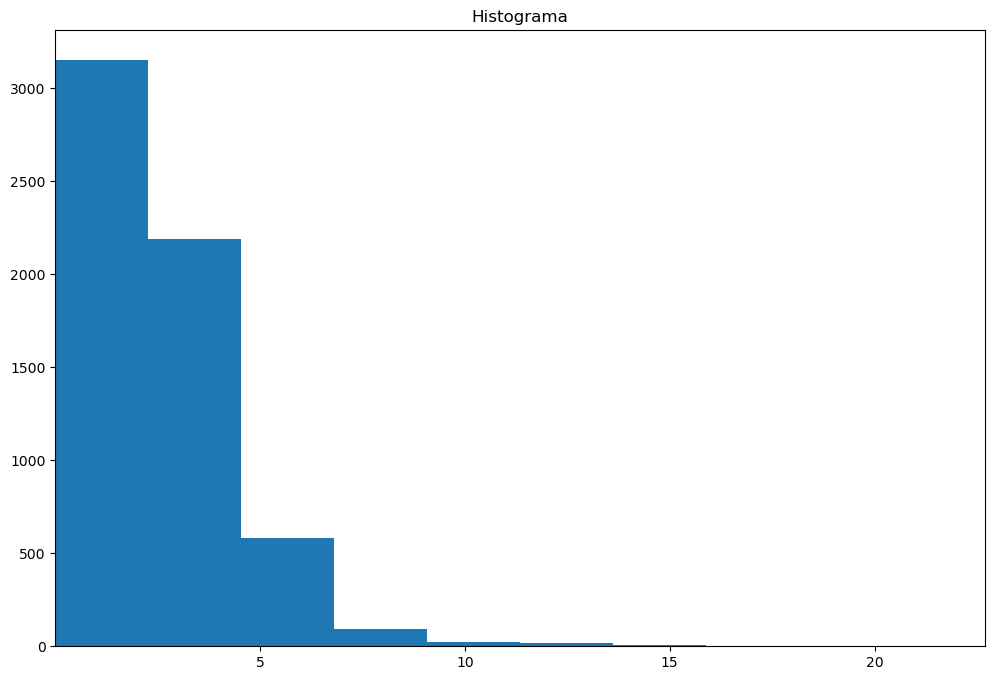

In [135]:
histograma(x = df_waterflow_processed["litros_por_cabeca"])

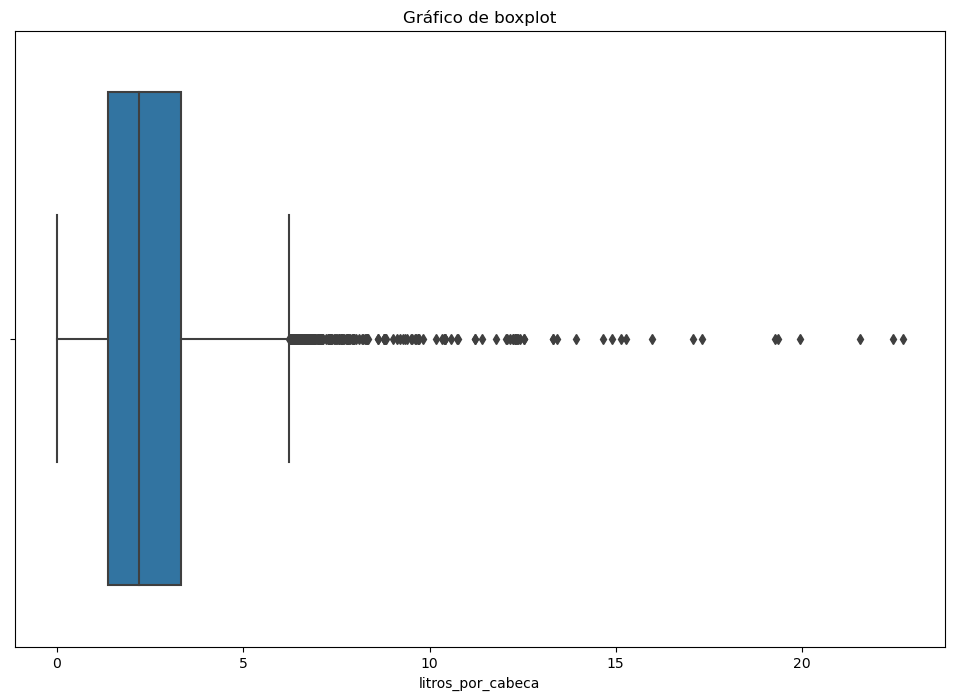

In [136]:
boxplot(x = df_waterflow_processed["litros_por_cabeca"])

Como podemos perceber, há muitos valores outliers em *litros_por_cabeca*.

Vamos excluir esses outliers utilizando do IQR.

#### Exclusao de outlier sobre a coluna *litros_por_cabeca*

##### recebendo os quartis e o interquartil

In [137]:
quartil1 = np.percentile(df_waterflow_processed["litros_por_cabeca"], 25, method = "midpoint")
quartil3 = np.percentile(df_waterflow_processed["litros_por_cabeca"], 75, method = "midpoint")
interquartil = quartil3 - quartil1
print("1ro quartil: ", quartil1, "\n3ro quartil: ", quartil3, "\nIQR: ", interquartil)

1ro quartil:  1.3804705774106911 
3ro quartil:  3.322055538696006 
IQR:  1.9415849612853147


##### Recebendo os valores de limite superior e inferior

In [138]:
limite_superior = quartil3 + (1.5 * interquartil)
limite_inferior = quartil1 - (1.5 * interquartil)
print("limite inferior: ", limite_inferior, "\nLimite Superior: ", limite_superior)

limite inferior:  -1.5319068645172806 
Limite Superior:  6.2344329806239775


##### Verificando a possibilidade de interferencia no dataframe com a exclusão dos valores outliers

Com o limite inferior:

In [139]:
df_waterflow_processed.query("litros_por_cabeca < @limite_inferior")

,dia_lote,estacao_ano,idade_animal,litros_por_cabeca,id_lote,id_produto


O dataset não possui valores abaixo do limite inferior.

Isso pode ser notado acima, onde vimos que o limite inferior é um valor negativo.

Em nosso caso, não há possibilidade de valores negativos no dataset.

Com o limite superior:

In [140]:
df_waterflow_processed.query("litros_por_cabeca > @limite_superior")

,dia_lote,estacao_ano,idade_animal,litros_por_cabeca,id_lote,id_produto
107,28,inv,28,7.565062,339544,n_3
108,29,inv,29,12.056683,339544,n_3
109,30,inv,30,12.286047,339544,n_3
110,31,inv,31,12.531358,339544,n_3
111,32,inv,32,11.208613,339544,n_3
...,...,...,...,...,...,...
5763,42,out,42,7.024104,539832,n_13
5764,43,out,43,7.578803,539832,n_13
5821,36,inv,36,6.908298,607457,n_13
5822,37,inv,37,7.859200,607457,n_13


Veriricando a quantidade total de linha afetadas:

In [141]:
df_waterflow_processed.query("litros_por_cabeca > @limite_superior").shape[0]

222

Verificando o tamanho do nosso dataset:

In [142]:
df_waterflow_processed.shape[0]

6074

Calculando a porcentagem de perda de linhas:

In [143]:
linhas_total = df_waterflow_processed.shape[0]
linhas_a_apagar = df_waterflow_processed.query("litros_por_cabeca > @limite_superior").shape[0]
((linhas_total - linhas_a_apagar) / linhas_total) * 100

96.34507737899243

Podemos então ver que, após a exclusão, perderemos por volta de 4% do nosso dataset.

4% é um valor viável, portanto iremos continuar com a exclusão.

##### Exclusao dos valores

In [144]:
df_limpo = df_waterflow_processed[~(df_waterflow_processed["litros_por_cabeca"] > limite_superior)]
df_limpo.sample(5)

,dia_lote,estacao_ano,idade_animal,litros_por_cabeca,id_lote,id_produto
3516,17,out,17,2.260766,405281,n_4
4186,32,pri,32,3.522812,387613,n_6
5463,4,inv,4,1.115555,638671,n_10
1233,37,pri,37,2.748904,483807,n_1
4057,20,inv,20,1.657027,339039,n_6


##### Como nossos dados ficaram após a exclusão:

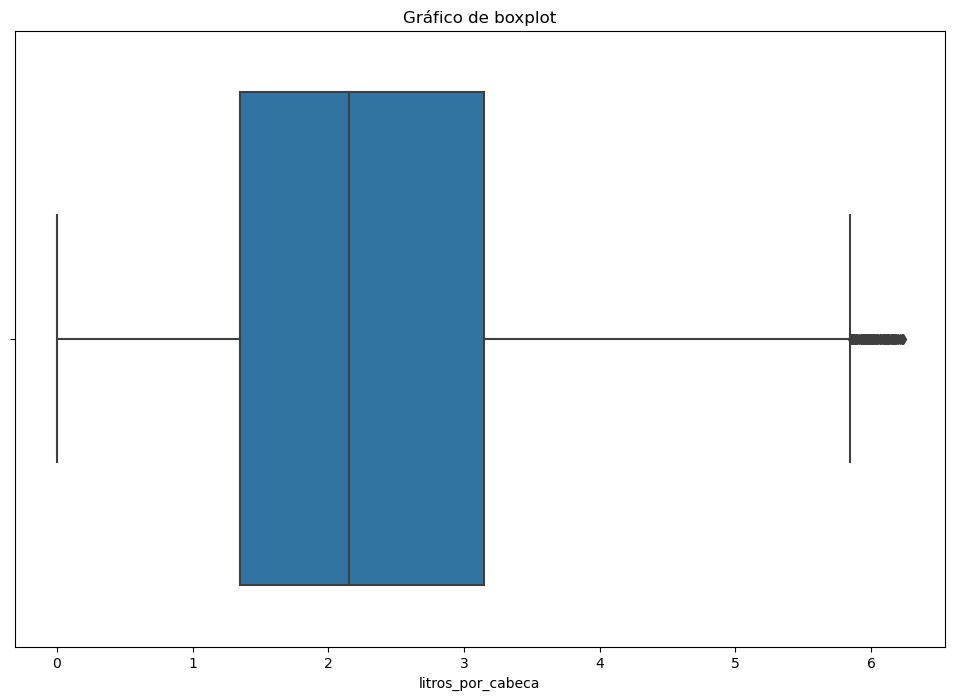

In [145]:
boxplot(x = df_limpo["litros_por_cabeca"])

#### Voltando a impressao dos dados

/tmp/ipykernel_43743/2553199722.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = x)


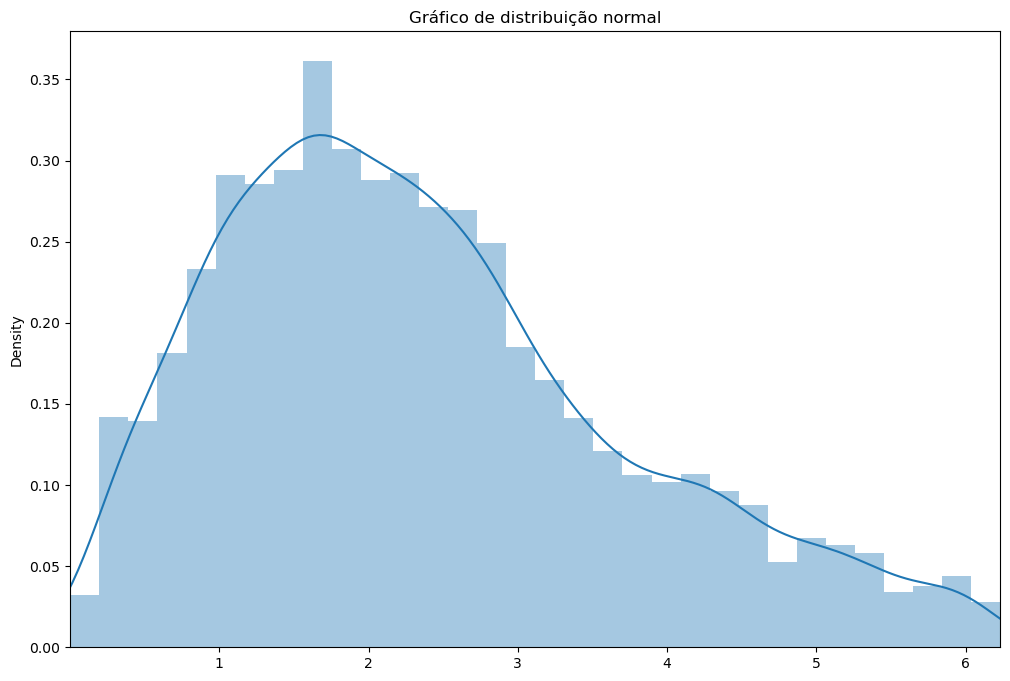

In [146]:
distribuicao_normal(x = df_limpo["litros_por_cabeca"])

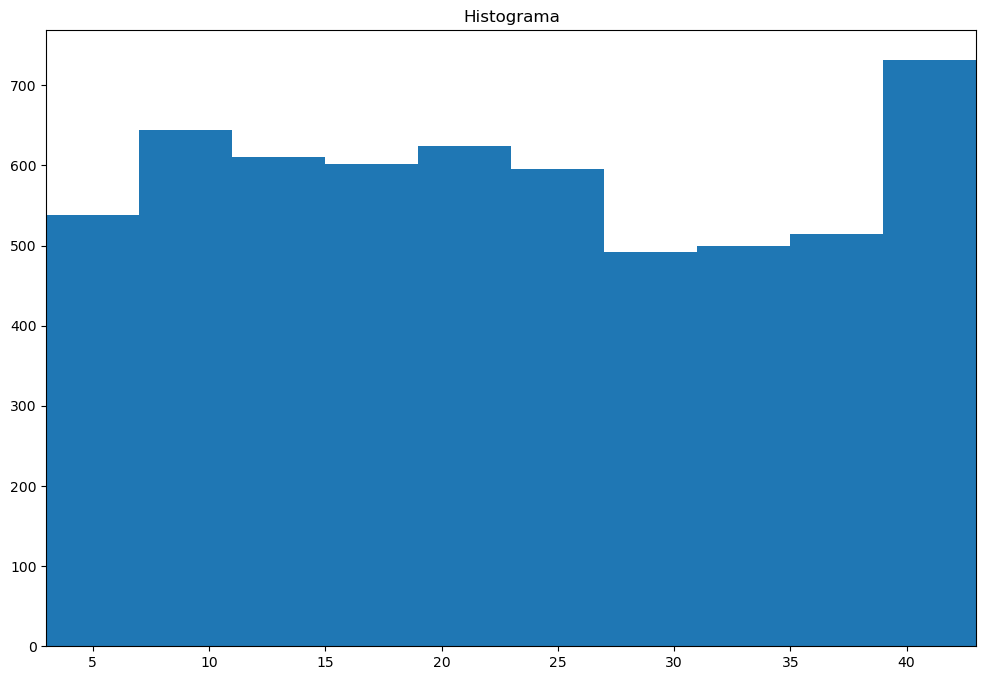

In [147]:
histograma(x = df_limpo["idade_animal"])

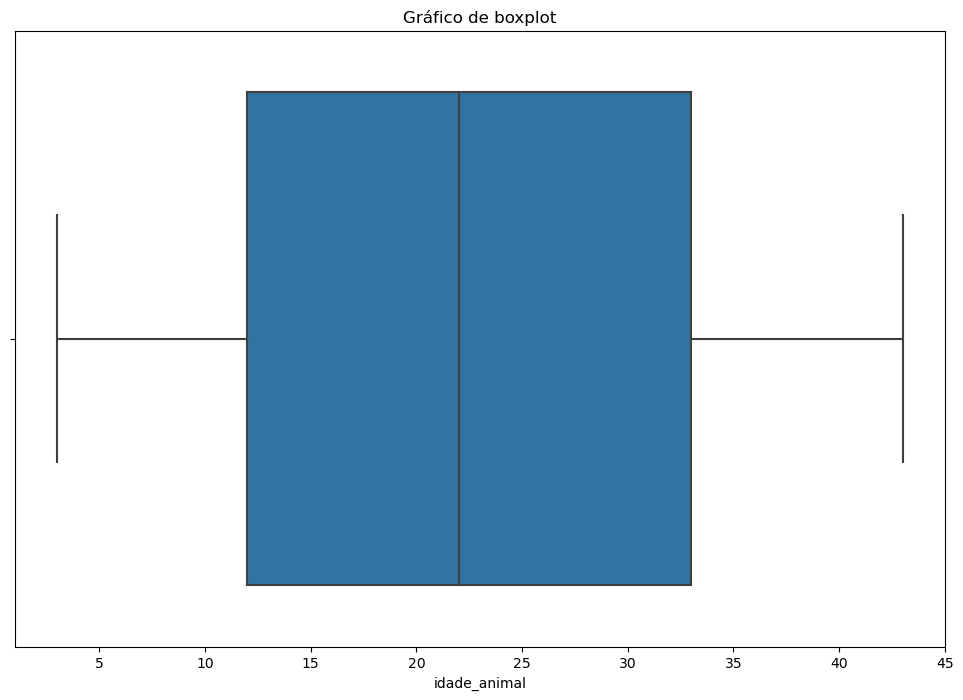

In [148]:
boxplot(x = df_limpo["idade_animal"])

/tmp/ipykernel_43743/2553199722.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = x)


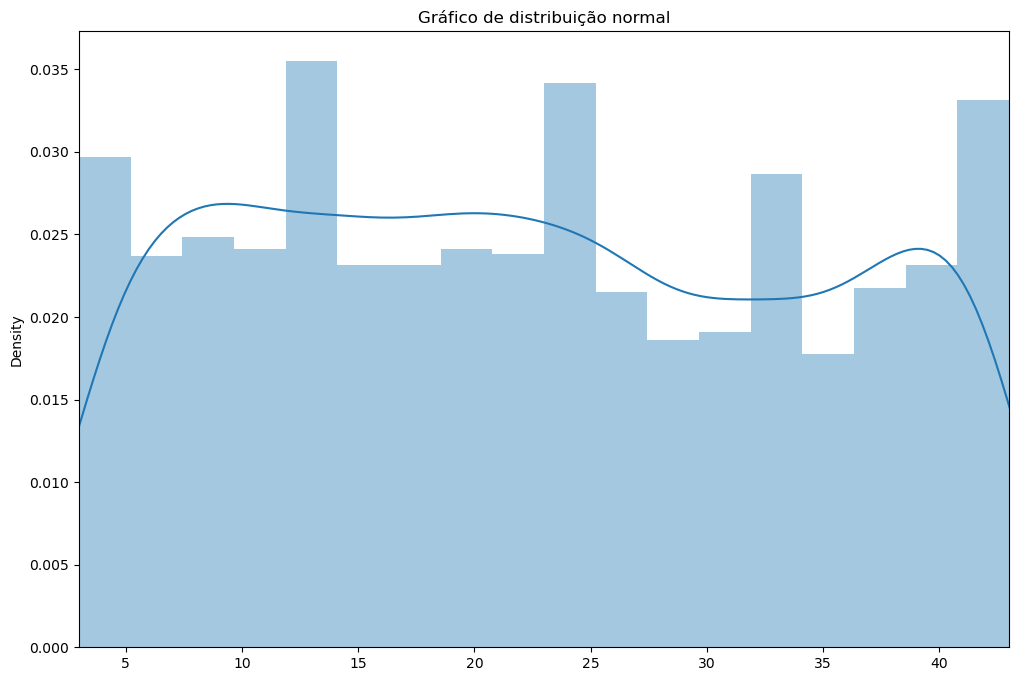

In [149]:
distribuicao_normal(x = df_limpo["idade_animal"])

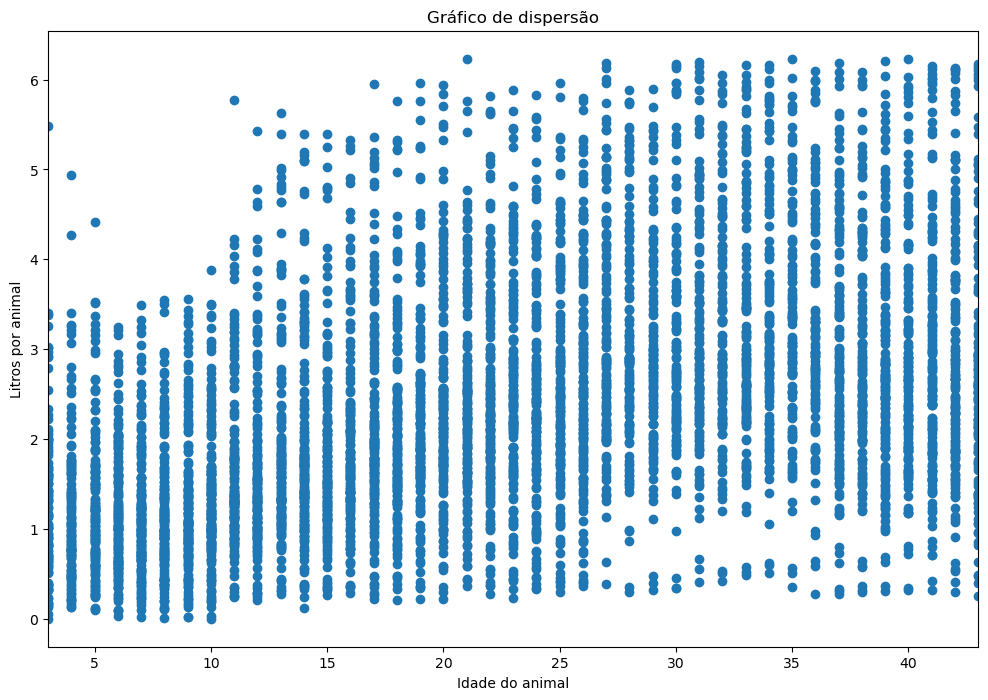

In [150]:
dispersao(
    y = df_limpo["litros_por_cabeca"],
    x = df_limpo["idade_animal"],
    xlabel = "Idade do animal",
    ylabel = "Litros por animal"
)

### Salvando o dataset limpo em um arquivo .pkl

In [151]:
df_limpo.to_pickle("datasets/processed/dataset-processado-limpo.pkl")

## Parte 1

### Como esta o dataset atual

In [152]:
df_limpo.sample(10)

,dia_lote,estacao_ano,idade_animal,litros_por_cabeca,id_lote,id_produto
4738,22,out,22,0.280629,902085,n_6
912,4,ver,4,1.643989,542539,n_0
5470,11,pri,11,1.117613,638671,n_10
4832,8,pri,8,2.277041,339085,n_7
5306,3,inv,3,0.765862,613466,n_8
5041,34,inv,34,3.691872,423951,n_7
1010,28,inv,28,3.682190,592317,n_0
2114,12,pri,12,1.024163,642729,n_2
4318,31,pri,31,2.163316,489709,n_6
5238,13,out,13,1.332787,546951,n_8


### Fazendo o pivoteamento do dataset

In [153]:
df_pivoteado = df_limpo.pivot_table(index="id_lote", columns = "dia_lote", values = "litros_por_cabeca")

#### Resultado do pivoteamento

In [154]:
df_pivoteado.sample(10)

dia_lote,3,4,5,6,7,8,9,10,11,12,...,34,35,36,37,38,39,40,41,42,43
id_lote,,,,,,,,,,,,,,,,,,,,,
817781,NaN,NaN,NaN,NaN,0.264872,1.443830,1.448458,1.406496,1.847935,1.690464,...,NaN,NaN,NaN,2.828319,NaN,1.619888,1.899981,2.115513,1.878080,2.138840
637194,NaN,NaN,NaN,0.637918,0.600881,0.622485,0.693161,0.773227,0.892838,0.969889,...,2.910332,3.356643,3.944308,3.681498,3.807046,3.217475,3.020909,3.384357,3.189756,2.938895
649206,0.909763,1.081751,1.204968,1.597715,1.496469,1.810907,1.635816,1.617587,1.254232,1.816773,...,NaN,NaN,NaN,NaN,2.563489,2.513524,1.781032,2.067363,2.834793,2.472562
637069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.742796,1.738773,NaN,1.409709,1.911816,1.612454,NaN,NaN
762905,1.592599,1.728988,2.534198,1.982880,1.566882,1.314790,3.431234,1.507481,1.049297,0.899708,...,NaN,NaN,NaN,NaN,NaN,NaN,1.651275,1.846139,1.890690,1.389585
583162,1.613079,1.232542,0.955589,1.114311,1.144546,1.527316,1.421594,1.184980,1.379083,1.730785,...,2.595150,2.861488,3.409371,2.918416,3.064859,2.601086,2.761742,2.448999,2.439421,2.602959
734395,1.437242,1.297943,1.287196,1.263882,1.377753,1.394483,1.385306,1.509043,1.688536,1.830451,...,3.730273,3.588522,3.299570,3.414829,3.174037,3.053490,3.285703,3.673081,3.758604,4.023166
542539,1.580300,1.643989,1.451859,1.748974,1.907912,2.078757,1.868640,2.169656,1.389198,2.705538,...,NaN,NaN,NaN,5.931370,5.941857,6.209930,NaN,NaN,NaN,6.025618
405280,2.007290,2.290730,1.764161,1.845534,2.139765,1.804337,2.095214,1.455471,2.289459,2.540559,...,2.829126,NaN,2.804047,NaN,2.380033,2.083301,2.547221,2.149564,NaN,2.281094


O pivoteamento gerou diversos valores NaNs.

Vamos verificar sua quantidade e achar um possível valor para substituição.

### Substituindo os valores NaNs do dataset pivoteado

#### Quantidade de valores faltantes por coluna

In [155]:
df_pivoteado.isna().sum()

dia_lote
3     73
4     61
5     44
6     36
7     32
8     27
9     26
10    23
11    39
12    39
13    33
14    30
15    35
16    40
17    39
18    36
19    30
20    32
21    37
22    29
23    38
24    41
25    41
26    36
27    60
28    63
29    71
30    66
31    62
32    67
33    62
34    62
35    72
36    73
37    46
38    47
39    35
40    40
41    34
42    49
43    50
dtype: int64

Vamos remover os valores faltantes utilizando a média móvel.

Se utilizarmos a média total, ou a mediana total, nesse caso, iremos gerar outliers.

#### Removendo os valores faltantes

Vamos utlizar a média móvel para a atribuição de dados faltantes


Visializando o dataset original:

In [156]:
df_pivoteado.head(10)

dia_lote,3,4,5,6,7,8,9,10,11,12,...,34,35,36,37,38,39,40,41,42,43
id_lote,,,,,,,,,,,,,,,,,,,,,
339039,NaN,1.768734,1.867669,1.675395,1.954148,2.379793,1.936753,1.293470,1.327862,1.268263,...,4.738066,5.302024,3.200834,2.978749,2.476053,1.153956,1.178127,1.445388,1.230691,1.241103
339040,NaN,NaN,1.110390,0.994459,1.040993,1.119633,1.178702,1.267142,1.315802,1.519834,...,4.553810,4.410547,3.864394,2.755256,3.238170,1.602191,1.766265,1.705054,1.109573,1.109972
339041,1.145028,0.933395,1.523945,1.206671,1.297428,1.392923,1.536658,1.652017,2.108097,NaN,...,3.335186,NaN,NaN,1.933081,2.146159,2.822815,2.671208,3.583001,3.770095,2.600234
339083,0.592304,1.318344,1.488223,1.580400,1.804873,1.926710,1.862184,1.834145,2.313046,2.345171,...,NaN,NaN,NaN,5.403673,NaN,NaN,NaN,NaN,NaN,NaN
339084,1.730569,1.676860,1.338435,1.758605,1.845718,1.923245,2.475163,2.047091,2.651210,3.186297,...,5.727516,5.816275,5.985742,4.727516,4.952837,4.786983,4.490277,4.390076,4.624108,NaN
339085,1.370917,0.930701,0.596879,1.598197,1.822402,2.277041,2.215409,2.376667,2.660015,2.860442,...,NaN,NaN,5.879867,NaN,5.123641,5.719313,5.594835,6.020599,5.408270,NaN
339544,3.379042,2.701410,1.715068,2.459088,2.489000,2.407515,2.561444,2.541369,3.248873,3.229835,...,NaN,NaN,NaN,NaN,NaN,5.535018,5.861594,5.635472,5.823789,6.065083
339545,NaN,1.923600,1.886053,2.167805,1.078008,2.724938,2.596581,2.664446,3.401880,NaN,...,NaN,NaN,NaN,4.556512,4.930827,3.148162,1.777856,1.945445,2.164016,1.857772
339546,1.511863,1.449944,1.452132,1.607852,1.579959,1.447910,1.748998,2.131425,NaN,2.544069,...,NaN,NaN,NaN,NaN,NaN,4.856086,4.839764,5.176429,5.099962,5.389501


Visualizando como seria o dataset com a média móvel calculada pelas colunas:

In [157]:
df_pivoteado.rolling(window = 5, min_periods = 1, center = True, axis = 0).mean()

dia_lote,3,4,5,6,7,8,9,10,11,12,...,34,35,36,37,38,39,40,41,42,43
id_lote,,,,,,,,,,,,,,,,,,,,,
339039,1.145028,1.351064,1.500668,1.292175,1.430856,1.630783,1.550704,1.404210,1.583920,1.394048,...,4.209020,4.856286,3.532614,2.555695,2.620127,1.859654,1.871867,2.244481,2.036786,1.650436
339040,0.868666,1.340158,1.497557,1.364231,1.524360,1.704765,1.628574,1.511694,1.766202,1.711089,...,4.209020,4.856286,3.532614,3.267690,2.620127,1.859654,1.871867,2.244481,2.036786,1.650436
339041,1.155967,1.424333,1.465732,1.443106,1.588632,1.748461,1.797892,1.618773,1.943203,2.079891,...,4.588644,5.176282,4.350323,3.559655,3.203304,2.591486,2.526469,2.780880,2.683617,1.650436
339083,1.209704,1.214825,1.211574,1.427667,1.562283,1.727910,1.853623,1.835413,2.209634,2.477936,...,4.538837,5.113411,5.243334,3.704881,3.865201,3.732826,3.630646,3.924682,3.728011,1.855103
339084,1.643572,1.512142,1.332510,1.720592,1.851884,1.985487,2.130172,2.090258,2.596248,2.905436,...,4.531351,5.816275,5.932804,4.021423,4.074212,4.716032,4.654478,4.907287,4.906565,4.332658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869971,2.220633,1.952839,1.852292,1.774754,1.471845,1.383035,0.905750,0.792617,0.644458,0.702417,...,1.760675,1.659651,1.663836,1.691102,1.686562,1.612574,1.716936,1.483301,1.876899,2.191408
880714,2.108527,1.950167,1.721817,1.669898,1.344181,1.275954,0.900036,0.831327,0.736574,0.745287,...,1.760675,1.659651,1.663836,1.691102,1.686562,1.612574,1.716936,1.483301,1.876899,1.981783
902085,1.937655,1.673716,1.333151,1.326888,1.227528,1.201168,0.775214,0.833614,0.664364,0.590340,...,1.687612,1.700562,1.748282,1.738278,1.656831,1.606680,1.885457,1.670824,2.039081,2.117133


No caso do dataframe logo acima, sabemos que se houver dados faltantes nas 5 ultimas linhas, eles não serão substituidos por nenhum valor.

No dataframe abaixo, nós calculamos a média móvel por colunas:

In [158]:
df_pivoteado.rolling(window = 5, min_periods = 1, center = True, axis = 1).mean()

dia_lote,3,4,5,6,7,8,9,10,11,12,...,34,35,36,37,38,39,40,41,42,43
id_lote,,,,,,,,,,,,,,,,,,,,,
339039,1.818202,1.770599,1.816487,1.929148,1.962752,1.847912,1.778405,1.641228,1.411409,1.231231,...,3.982116,3.873807,3.739145,3.022323,2.197544,1.846455,1.496843,1.249853,1.273827,1.305727
339040,1.110390,1.052424,1.048614,1.066369,1.088835,1.120186,1.184455,1.280223,1.384833,1.431204,...,3.978429,3.841944,3.764435,3.174112,2.645255,2.213387,1.884251,1.458611,1.422716,1.308200
339041,1.200789,1.202260,1.221293,1.270872,1.391525,1.417140,1.597425,1.672424,1.626122,1.581741,...,4.651879,3.505311,2.471475,2.300685,2.393316,2.631253,2.998656,3.089471,3.156134,3.317777
339083,1.132957,1.244818,1.356829,1.623710,1.732478,1.801662,1.948192,2.056251,2.173159,2.250902,...,4.762909,5.385825,5.403673,5.403673,5.403673,5.403673,NaN,NaN,NaN,NaN
339084,1.581955,1.626117,1.670037,1.708573,1.868233,2.009964,2.188485,2.456601,2.702466,2.876005,...,5.718014,5.587005,5.441977,5.253871,4.988671,4.669537,4.648856,4.572861,4.501487,4.507092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869971,1.179628,1.156033,1.128770,0.899048,0.773455,0.703784,0.537976,0.375433,0.258611,0.331674,...,1.689619,1.268175,1.372906,1.366300,1.502630,1.496686,1.492024,1.369876,1.487277,1.292623
880714,3.198973,3.187969,3.159708,3.255742,3.005141,2.702977,2.235707,1.778144,1.235398,1.100564,...,3.271369,3.112229,2.947924,2.814887,2.770683,2.674659,2.608048,2.611648,2.542528,2.451587
902085,1.034601,0.995313,0.936669,0.846333,0.696039,0.564240,0.484271,0.439601,0.452127,0.490464,...,0.531950,0.596059,0.609077,0.632740,0.663264,0.677310,0.822058,1.091075,1.206946,1.369559


No caso do dataframe logo acima, sabemos que se houver dados faltantes nas 5 ultimas colunas, eles não serão substituidos por nenhum valor.

No dataframe abaixo, nós calculamos a média móvel por uma mescla das linhas pelas colunas, isso deixa a existência de valores faltantes muito baixa de ocorrer:

In [159]:
df_pivoteado.rolling(window = 5, min_periods = 1, center = True, axis = 1).mean().fillna(df_pivoteado.rolling(window = 5, min_periods = 1, center = True, axis = 0).mean())

dia_lote,3,4,5,6,7,8,9,10,11,12,...,34,35,36,37,38,39,40,41,42,43
id_lote,,,,,,,,,,,,,,,,,,,,,
339039,1.818202,1.770599,1.816487,1.929148,1.962752,1.847912,1.778405,1.641228,1.411409,1.231231,...,3.982116,3.873807,3.739145,3.022323,2.197544,1.846455,1.496843,1.249853,1.273827,1.305727
339040,1.110390,1.052424,1.048614,1.066369,1.088835,1.120186,1.184455,1.280223,1.384833,1.431204,...,3.978429,3.841944,3.764435,3.174112,2.645255,2.213387,1.884251,1.458611,1.422716,1.308200
339041,1.200789,1.202260,1.221293,1.270872,1.391525,1.417140,1.597425,1.672424,1.626122,1.581741,...,4.651879,3.505311,2.471475,2.300685,2.393316,2.631253,2.998656,3.089471,3.156134,3.317777
339083,1.132957,1.244818,1.356829,1.623710,1.732478,1.801662,1.948192,2.056251,2.173159,2.250902,...,4.762909,5.385825,5.403673,5.403673,5.403673,5.403673,3.630646,3.924682,3.728011,1.855103
339084,1.581955,1.626117,1.670037,1.708573,1.868233,2.009964,2.188485,2.456601,2.702466,2.876005,...,5.718014,5.587005,5.441977,5.253871,4.988671,4.669537,4.648856,4.572861,4.501487,4.507092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869971,1.179628,1.156033,1.128770,0.899048,0.773455,0.703784,0.537976,0.375433,0.258611,0.331674,...,1.689619,1.268175,1.372906,1.366300,1.502630,1.496686,1.492024,1.369876,1.487277,1.292623
880714,3.198973,3.187969,3.159708,3.255742,3.005141,2.702977,2.235707,1.778144,1.235398,1.100564,...,3.271369,3.112229,2.947924,2.814887,2.770683,2.674659,2.608048,2.611648,2.542528,2.451587
902085,1.034601,0.995313,0.936669,0.846333,0.696039,0.564240,0.484271,0.439601,0.452127,0.490464,...,0.531950,0.596059,0.609077,0.632740,0.663264,0.677310,0.822058,1.091075,1.206946,1.369559


Visualmente, no dataframe acima não há nenhum valor faltante, vamos provar isso:

In [160]:
df_pivoteado.rolling(window = 5, min_periods = 1, center = True, axis = 1).mean()\
    .fillna(df_pivoteado.rolling(window = 5, min_periods = 1, center = True, axis = 0).mean()).isna().sum()

dia_lote
3     0
4     2
5     1
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    1
30    1
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
dtype: int64

Como é possivel visualizar acima, ainda possuímos 5 valores não numéricos.

Os valores estão disposta na colunas *4*, *5*, *29* e *30*.

Sendo 1 nas colunas *4*, *29* e *30*, e 2 na coluna *5*.

Vamos realizar a substituição pela média móvel, por coluna, mais uma vez:

In [161]:
df_pivoteado = df_pivoteado.rolling(window = 5, min_periods = 1, center = True, axis = 1).mean()\
    .fillna(df_pivoteado.rolling(window = 5, min_periods = 1, center = True, axis = 0).mean())

In [162]:
df_pivoteado.rolling(window = 5, min_periods = 1, center = True, axis = 1).mean()\
    .fillna(df_pivoteado.rolling(window = 5, min_periods = 1, center = True, axis = 0).mean()).isna().sum()

dia_lote
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
dtype: int64

Agora que provamos que não teremos valores faltantes, vamos fazer a mudança em nosso dataframe de trabalho:

In [163]:
df_pivoteado = df_pivoteado.rolling(window = 5, min_periods = 1, center = True, axis = 1).mean()\
    .fillna(df_pivoteado.rolling(window = 5, min_periods = 1, center = True, axis = 0).mean())

Uma amostra dos dados:

In [164]:
df_pivoteado.sample(10)

dia_lote,3,4,5,6,7,8,9,10,11,12,...,34,35,36,37,38,39,40,41,42,43
id_lote,,,,,,,,,,,,,,,,,,,,,
638671,1.101292,1.097914,1.092759,1.077341,1.081089,1.091393,1.112417,1.155403,1.221696,1.302501,...,2.068128,2.095136,2.153822,2.235510,2.324646,2.416464,2.496321,2.548121,2.576430,2.599613
638672,2.656268,2.681026,2.726870,2.820063,2.949072,3.131973,3.371160,3.638215,3.839355,3.909419,...,4.917410,5.093338,5.286340,5.437110,5.534012,5.480811,5.364170,5.174499,5.092552,5.016467
479845,2.050535,2.093650,2.161237,2.291547,2.503697,2.716777,3.026117,3.358616,3.728024,4.031669,...,4.737979,4.531784,4.880187,5.164095,4.849086,4.705914,4.620064,4.543098,4.486141,4.478287
712037,0.274965,0.278130,0.286975,0.303700,0.339066,0.400107,0.470904,0.567063,0.693893,0.813970,...,1.679612,1.741954,1.820176,1.946108,2.099053,2.262948,2.374924,2.461303,2.491040,2.514895
501978,0.809548,0.816093,0.828039,0.844069,0.892639,0.960274,1.027666,1.106541,1.189197,1.270405,...,4.937048,4.952625,4.785090,4.625650,4.460456,4.377097,4.352731,4.409870,4.425722,4.453892
400139,2.081207,2.118012,2.174195,2.235291,2.256263,2.279915,2.327321,2.307194,2.359139,2.517130,...,4.494246,4.618016,4.368782,4.194392,4.015153,4.078817,4.071246,3.837202,3.899746,3.851734
387620,1.653134,1.676791,1.703208,1.779262,1.888013,2.025656,2.210703,2.402284,2.558869,2.652341,...,4.609051,4.719187,4.612320,4.343032,4.050267,3.692082,3.385267,3.203518,3.108511,3.021773
687039,1.109232,1.140583,1.172371,1.211219,1.245798,1.283319,1.313552,1.341204,1.390300,1.454008,...,2.777421,2.751615,2.688281,2.626094,2.613219,2.643609,2.694971,2.770649,2.821907,2.866773
516243,1.541004,1.560528,1.562041,1.565211,1.522916,1.512882,1.484232,1.464110,1.460944,1.516464,...,3.564590,3.525218,3.401008,3.174919,2.971146,2.758913,2.691930,2.885989,3.002519,3.060018


### Salvando o dataset pivoteado e limpo em um arquivo .pkl

In [165]:
df_pivoteado.to_pickle("datasets/processed/dataset-pivoteado-limpo.pkl")

### Agrupando o dataframe

#### Selecionando o melhor parâmetro

##### Atribuindo a quantidade de clusters que serão utilizados

In [166]:
nro_de_cluster = [i for i in range(2, 13)]
print("Conteúdo da lista: ", nro_de_cluster)
print("Seu tipo é: ", type(nro_de_cluster))

Conteúdo da lista:  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Seu tipo é:  <class 'list'>


##### Atribuindo o número de vezes que o algoritmo irá rodar com diferentes centroides

In [167]:
qtd_de_rodadas = [i for i in range(10, 130, 10)]
print("Conteúdo da lista: ", qtd_de_rodadas)
print("Seu tipo é: ", type(qtd_de_rodadas))

Conteúdo da lista:  [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
Seu tipo é:  <class 'list'>


##### Lista auxiliar para a escolha dos melhores parâmetros

In [168]:
melhores_parametros = {
    "numero_de_clusters" : 1,
    "quantidade_de_rodadas" : 9,
    "Score" : 0
}

print(melhores_parametros)

{'numero_de_clusters': 1, 'quantidade_de_rodadas': 9, 'Score': 0}


##### Seleção do parâmetro

In [169]:
qtd_de_rodadas.append("auto")

In [170]:
def atualiza_dicionario(melhores_parametros:dict, nro_cluster:int, rodada:int, score_atual:float) -> dict:
    melhores_parametros = {
        "numero_de_clusters" : nro_cluster,
        "quantidade_de_rodadas" : rodada,
        "Score" : score_atual
    }
    
    return melhores_parametros

In [171]:
for nro_cluster in nro_de_cluster:
    for rodada in qtd_de_rodadas:
        kmeans = KMeans(
                        n_clusters = nro_cluster,
                        n_init = rodada,
                        random_state = 50 # deixando a SEED manual para futuras observacoes
                    )
        kmeans.fit(df_pivoteado)
        
        # usando o silhouette para pegar os score de forma limpa
        score_atual = silhouette_score(df_pivoteado, kmeans.labels_)
        
        # salvando os melhores parametros
        if score_atual > melhores_parametros["Score"]:
            melhores_parametros = atualiza_dicionario(melhores_parametros, nro_cluster, rodada, score_atual)
    
melhores_parametros

{'numero_de_clusters': 2,
 'quantidade_de_rodadas': 10,
 'Score': 0.47665675971555743}

#### Agrupando com o modelo KMeans e os melhores resultados demonstrados anteriormente

##### Número máximo de iterações

In [172]:
maximo_de_iteracoes = 1200

##### Treinando o modelo

In [173]:
kmeans = KMeans(
            n_clusters = melhores_parametros["numero_de_clusters"],
            n_init = melhores_parametros["quantidade_de_rodadas"],
            max_iter = maximo_de_iteracoes,
            random_state = 50 # deixando a SEED manual para futuras observacoes
        )
kmeans.fit(df_pivoteado)

KMeans(max_iter=1200, n_clusters=2, n_init=10, random_state=50)

#### Resultado da previsão

In [174]:
y_predicao = kmeans.predict(df_pivoteado)
print(len(y_predicao))
print(y_predicao)

188
[1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1
 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


#### Visualizando as classes e suas ocorrências

In [175]:
classes, quantidade = np.unique(y_predicao, return_counts = True)

for i in range(0, len(classes)):
    print(f"Para a classe {classes[i]}, existem {quantidade[i]} ocorrências.")

Para a classe 0, existem 56 ocorrências.
Para a classe 1, existem 132 ocorrências.


#### Visualizando as classes de forma gráfica

##### Relembrando os nomes das colunas

In [176]:
df_limpo.columns

Index(['dia_lote', 'estacao_ano', 'idade_animal', 'litros_por_cabeca',
       'id_lote', 'id_produto'],
      dtype='object')

##### Os centróides

In [177]:
centroides = kmeans.cluster_centers_
centroides

array([[1.81338081, 1.8215393 , 1.83726054, 1.86948544, 1.93353979,
        2.01089222, 2.14298374, 2.2991097 , 2.48252067, 2.66298376,
        2.84178338, 2.98781229, 3.12632528, 3.25141828, 3.36839543,
        3.486108  , 3.60343042, 3.7074363 , 3.79138148, 3.85691483,
        3.92295418, 4.00165339, 4.10232027, 4.23328614, 4.36725333,
        4.46223466, 4.54789637, 4.60516374, 4.61954243, 4.62242843,
        4.6689387 , 4.69409176, 4.68690679, 4.6515725 , 4.60328613,
        4.50173775, 4.41085242, 4.33977763, 4.27790021, 4.24626436,
        4.23940877],
       [1.03899703, 1.03406966, 1.03299136, 1.01801918, 1.02122906,
        1.04420054, 1.08427197, 1.13657015, 1.21572195, 1.29436482,
        1.3713273 , 1.43117349, 1.4940365 , 1.54374808, 1.60146842,
        1.66149777, 1.74000226, 1.80649866, 1.87426975, 1.93098566,
        1.99007121, 2.04483829, 2.13087053, 2.22828927, 2.35824863,
        2.46470866, 2.56119794, 2.62532081, 2.68842552, 2.72073477,
        2.73540989, 2.73571

#### Separando os clusters

* dados_classe_1: os dados filtrados que pertencem a classe 0 predita no kmeans

* dados_classe_2: os dados filtrados que pertencem a classe 1 predita no kmeans

In [178]:
dados_classe_1 = df_pivoteado[df_pivoteado.classe == 0].drop(columns = "classe")
dados_classe_2 = df_pivoteado[df_pivoteado.classe == 1].drop(columns = "classe")

AttributeError: 'DataFrame' object has no attribute 'classe'

#### Imprimindo o gráfico

##### Gráfico de linhas

###### Classe 0

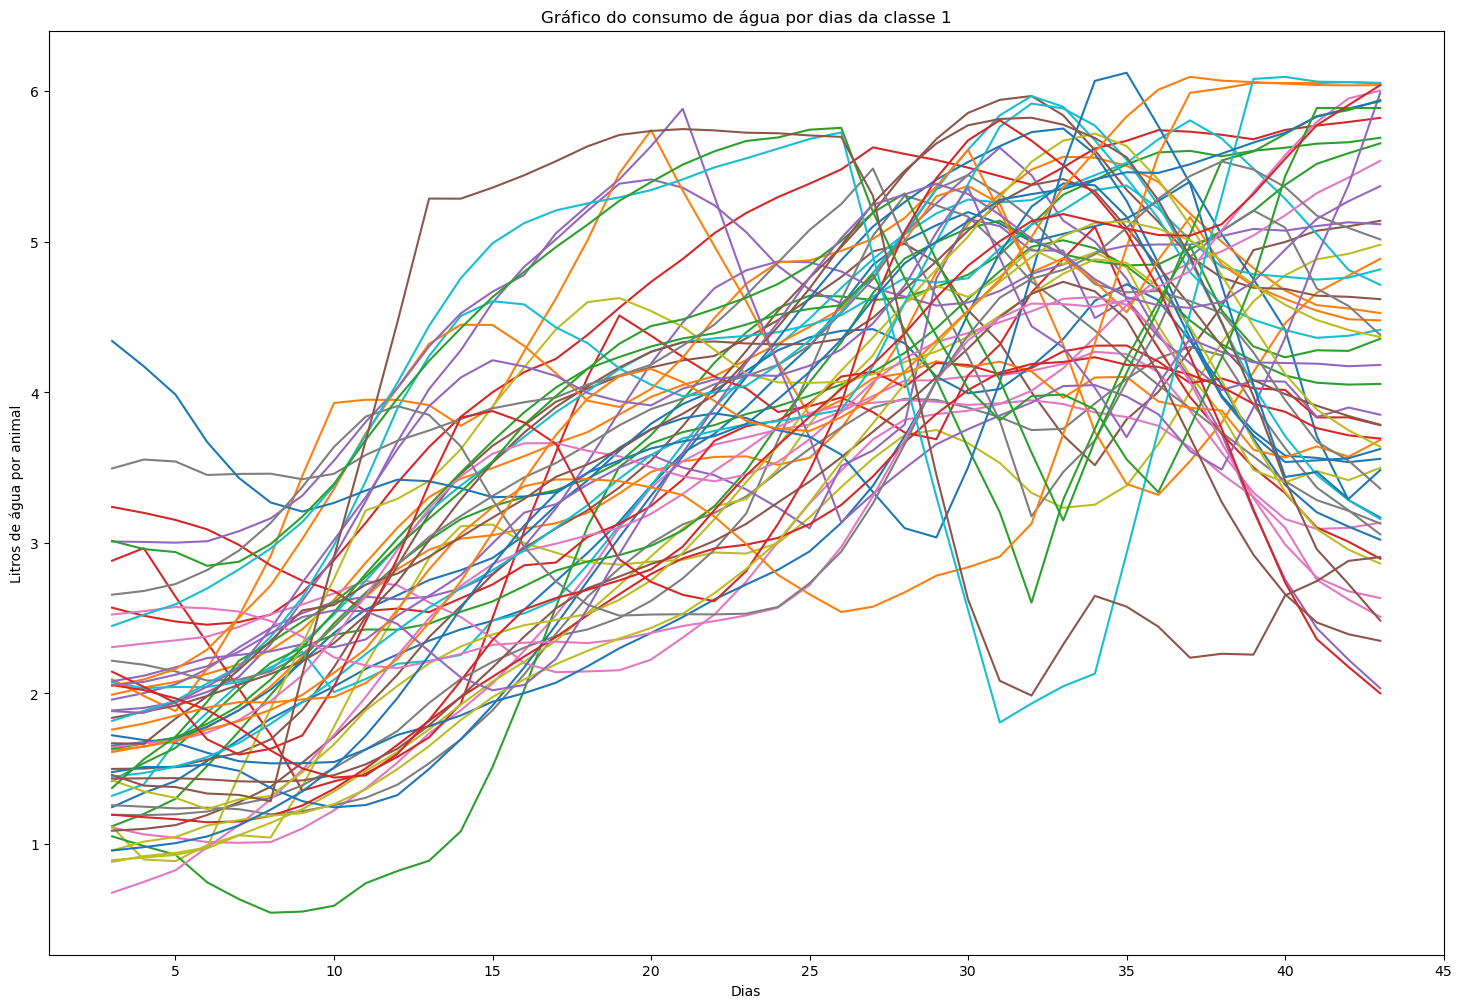

In [ ]:
figura = plt.figure(figsize = (18, 12))

for indice in dados_classe_1.index:
     sns.lineplot(dados_classe_1.loc[indice])
     
plt.title("Gráfico do consumo de água por dias da classe 1")    
plt.xlabel("Dias")
plt.ylabel("Litros de água por animal")
plt.show()


###### Classe 1:

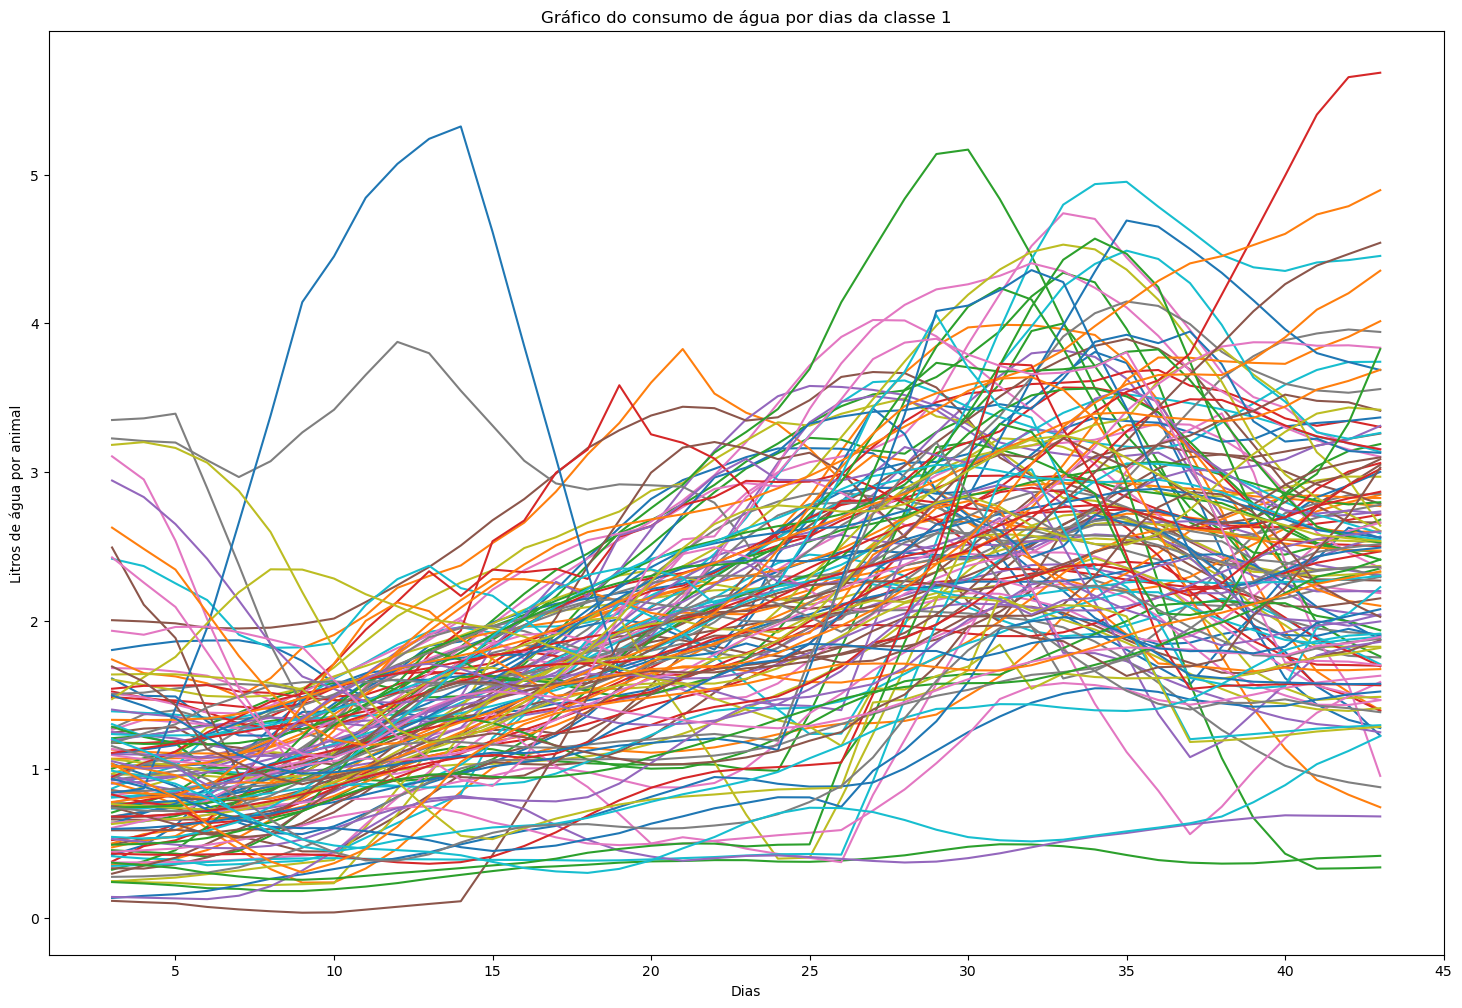

In [ ]:
figura = plt.figure(figsize = (18, 12))

for indice in dados_classe_2.index:
     sns.lineplot(dados_classe_2.loc[indice])

plt.title("Gráfico do consumo de água por dias da classe 1")
plt.xlabel("Dias")
plt.ylabel("Litros de água por animal")
plt.show()


##### Gráfico de dispersão

###### Classe 0

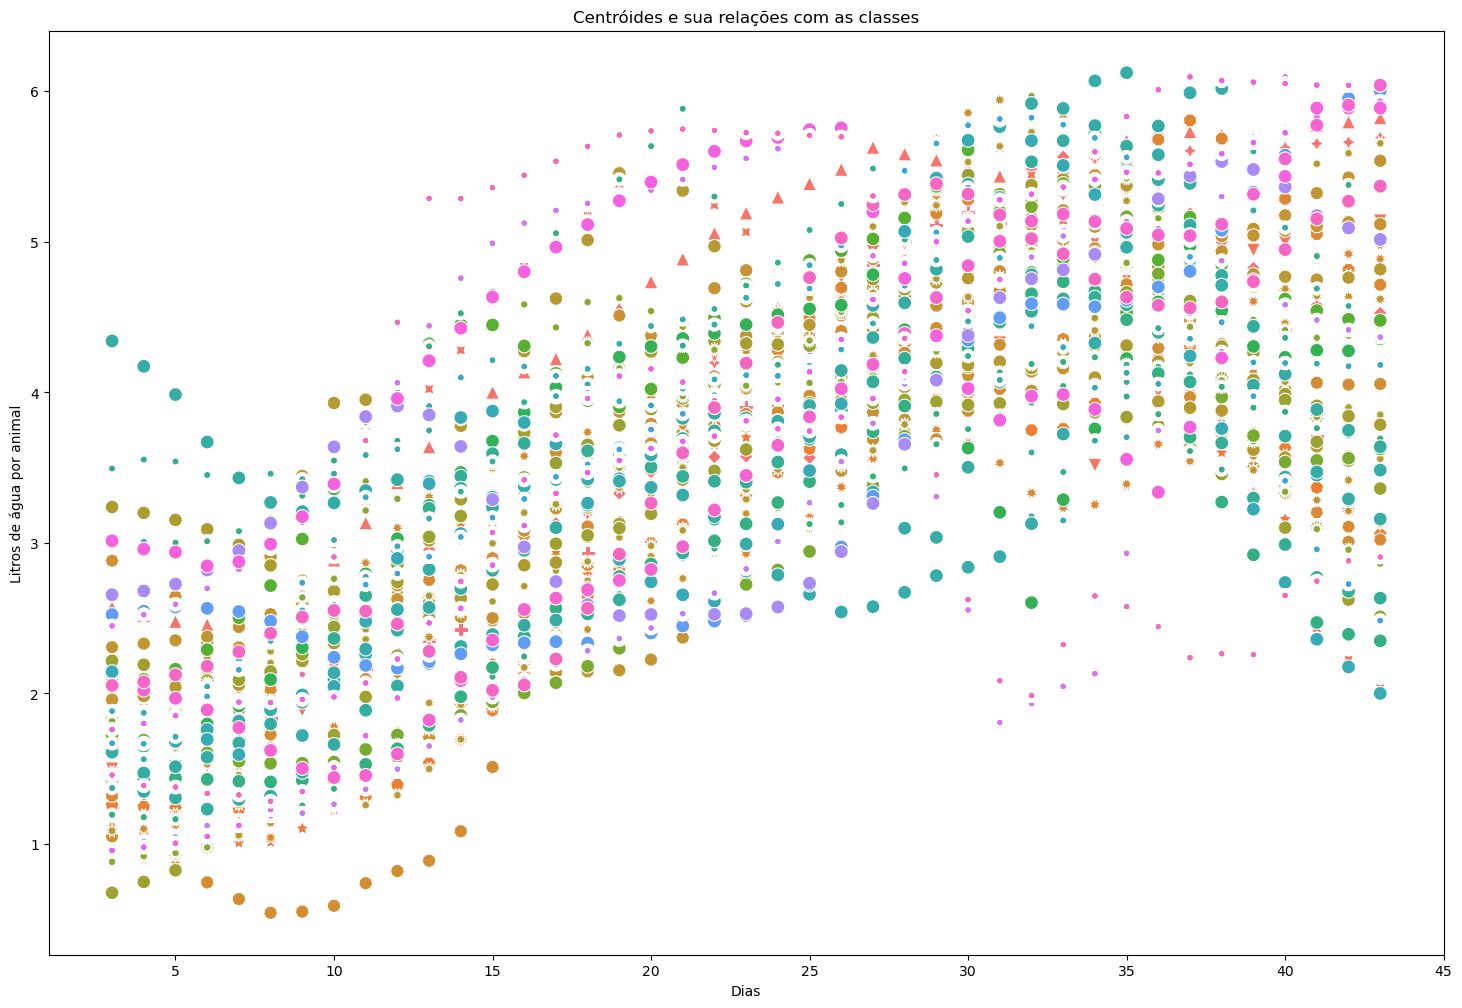

In [184]:
figura = plt.figure(figsize = (18, 12))
sns.scatterplot(dados_classe_1.T, s = 100, legend = None)
plt.title("Centróides e sua relações com as classes")
plt.xlabel("Dias")
plt.ylabel("Litros de água por animal")
plt.show()

###### Classe 1:

In [ ]:
# figura = plt.figure(figsize = (18, 12))
# #sns.scatterplot(data = df_limpo, x = "dia_lote", y = "litros_por_cabeca", s = 80, cmap = "coolwarm") # , c = y_predicao
# sns.scatterplot(data = df_pivoteado.T, s = 80)
# sns.scatterplot(x = centroides[:, 0], y = centroides[:, 1], s = 140, c = "black", alpha = 0.8)
# plt.title("Centróides e sua relações com as classes")
# plt.xlabel("Dias")
# plt.ylabel("Litros de água por animal")
# plt.show()

## Parte 2